In [1]:
freq_dict = {'15-min':'15T',
            '1-hour':'1H',
            '2-hour':'2H',
            '4-hour':'4H',
            '6-hour':'6H',
            '8-hour':'8H',
            '12-hour':'12H',
            '1-day':'1D',
            '2-day':'2D',
            '7-day':'7D',
            '15-day':'15D',
            '1-month':'1M'}

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from copy import deepcopy


In [3]:
metadata_df = pd.read_csv("./metadata.csv",index_col=0)
feeds = {'use':'aggregate',
        'air1':'hvac',
         'range1':'range',
         'clotheswasher1':'wm',
         'dishwasher1':'dw',
         'microwave1':'mw',
         'refrigerator1':'fridge',
         'oven1':'oven',
        'car1':'ec',
         'waterheater1':'wh',
         'drye1':'dr'
        }

In [4]:
city = 'Austin'
year = 2015

In [5]:
st = pd.HDFStore(os.path.expanduser("../all.h5"), mode='r')

In [6]:
st['2242']

,use,air1,air2,bathroom1,clotheswasher1,dishwasher1,drye1,furnace1,kitchenapp1,kitchenapp2,livingroom1,livingroom2,microwave1,office1,outsidelights_plugs1,oven1,range1,refrigerator1,sprinkler1
localhour,,,,,,,,,,,,,,,,,,,
2012-07-13 19:00:00-05:00,3986.949951,13.750000,1605.516724,NaN,NaN,NaN,4.133333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,57.516666,5.983333,8.383333,NaN,6.350000
2012-07-13 20:00:00-05:00,4497.083496,14.966666,1589.033325,NaN,NaN,NaN,4.016667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,57.583332,7.450000,10.400000,NaN,6.683333
2012-07-13 21:00:00-05:00,5103.750000,16.250000,1559.333374,NaN,NaN,NaN,4.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,55.200001,7.466667,14.666667,NaN,6.033333
2012-07-13 22:00:00-05:00,5676.383301,18.666666,1551.783325,NaN,NaN,NaN,4.816667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,56.016666,9.166667,15.083333,NaN,6.733333
2012-07-13 23:00:00-05:00,5311.399902,584.266663,938.299988,NaN,NaN,NaN,5.183333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.633333,9.883333,9.600000,NaN,7.500000
2012-07-14 00:00:00-05:00,4177.683105,843.783325,761.599976,NaN,NaN,NaN,3.800000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.333333,7.883333,5.666667,NaN,7.116667
2012-07-14 01:00:00-05:00,3582.933350,553.650024,1312.916626,NaN,NaN,NaN,4.116667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.416667,6.916667,1.966667,NaN,7.150000
2012-07-14 02:00:00-05:00,2786.250000,377.566681,977.416687,NaN,NaN,NaN,2.916667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.433333,5.666667,2.066667,NaN,6.633333
2012-07-14 03:00:00-05:00,1567.933350,6.350000,621.016663,NaN,NaN,NaN,1.633333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.283333,2.416667,1.816667,NaN,5.416667


In [8]:
APPLIANCES_ORDER = ['aggregate', 'hvac', 'fridge', 'mw', 'dw', 'wm', 'oven','wh','dr','range']

In [9]:
((365*24)//freq_num)

8760

In [15]:
st['5275']['2015'].resample(freq).mean()

,use,air1,bathroom1,clotheswasher1,dishwasher1,disposal1,drye1,dryg1,furnace1,kitchenapp1,kitchenapp2,microwave1,range1,refrigerator1
localhour,,,,,,,,,,,,,,
2015-01-01 00:00:00-06:00,823.416687,0.0,0.0,0.000000,0.000000,0.00,NaN,0.000000,245.583328,0.000000,3.766667,15.550000,0.0,58.816666
2015-01-01 01:00:00-06:00,647.366638,0.0,0.0,0.000000,0.000000,0.00,NaN,0.000000,79.300003,0.000000,3.250000,15.850000,0.0,55.783333
2015-01-01 02:00:00-06:00,765.816650,0.0,0.0,0.000000,0.000000,0.00,NaN,0.000000,378.533325,0.000000,4.566667,15.216666,0.0,65.033333
2015-01-01 03:00:00-06:00,226.433334,0.0,0.0,0.000000,0.000000,0.00,NaN,0.000000,10.000000,0.000000,4.000000,15.916667,0.0,48.316666
2015-01-01 04:00:00-06:00,574.266663,0.0,0.0,0.000000,0.000000,0.00,NaN,0.000000,344.250000,0.000000,4.633333,15.166667,0.0,68.966667
2015-01-01 05:00:00-06:00,321.333344,0.0,0.0,0.000000,0.000000,0.00,NaN,0.000000,18.316668,0.000000,4.116667,15.050000,0.0,120.433334
2015-01-01 06:00:00-06:00,660.933350,0.0,0.0,0.000000,0.000000,0.00,NaN,0.000000,322.366669,0.000000,4.733333,14.883333,0.0,183.616669
2015-01-01 07:00:00-06:00,581.383362,0.0,0.0,0.000000,0.000000,0.00,NaN,0.000000,375.500000,0.000000,4.666667,15.000000,0.0,42.383335
2015-01-01 08:00:00-06:00,461.766663,0.0,0.0,0.000000,0.000000,0.00,NaN,0.000000,193.016663,0.000000,4.383333,15.000000,0.0,84.766670


In [14]:
homes = {}
#for freq in ['2H','4H','12H','1H']:
for freq in ['1H']:
    print(freq)
    freq_num = int(freq[:-1])
    out = []
    homes[freq] = []
    city_data = metadata_df[metadata_df['city'] == city]
    city_homes = city_data.index.values.astype('int')
    for home in city_homes[:]:

        try:
            data_df = st['/%d' %home]['%s' %year]

            # Only consider homes that have data from Jan 1 to Dec 31
            day_of_year = data_df.index.dayofyear
            if day_of_year[0]==1 and day_of_year[-1]==365:
                downsampled_data = data_df.resample(freq).mean()
                if len(downsampled_data)<((365*24)//freq_num):
                    continue
                print(home, len(downsampled_data))
                downsampled_data = downsampled_data.rename(columns=feeds)
                o =  [None] * len(APPLIANCES_ORDER)
                for a_num, appliance in enumerate(APPLIANCES_ORDER):
                    if appliance in downsampled_data.columns:
                        o[a_num] = downsampled_data[appliance].values.reshape(365, 24//freq_num)
                    else:
                        o[a_num] = np.zeros((365, 24//freq_num))
                        o[a_num].fill(np.nan)
                out.append(o)
                homes[freq].append(home)

            else:
                continue
        except Exception as e:
            print(e)
    out = np.array(out)
    

   

1H
'No object named /2836 in the file'
'No object named /2743 in the file'
'No object named /5323 in the file'
'No object named /8560 in the file'
'No object named /3313 in the file'
'No object named /5052 in the file'
'No object named /3936 in the file'
'No object named /1622 in the file'
'No object named /1114 in the file'
'No object named /5433 in the file'
'No object named /1101 in the file'
'2015'
'2015'
'No object named /3824 in the file'
'No object named /78 in the file'
'2015'
'No object named /5839 in the file'
'No object named /1050 in the file'
'2015'
'2015'
3192 8760
'No object named /18 in the file'
'No object named /35 in the file'
114 8760
370 8760
545 8760
585 8760
661 8760
744 8760
'No object named /964 in the file'
1192 8760
1463 8760
1642 8760
1718 8760
1790 8760
1800 8760
'No object named /1852 in the file'
2018 8760
2129 8760
2233 8760
2337 8760
'No object named /2345 in the file'
2461 8760
2575 8760
2638 8760
'No object named /2645 in the file'
'No object named /2

2532 8760
'No object named /6558 in the file'
'2015'
'2015'
'No object named /6744 in the file'
'No object named /820 in the file'
'2015'
'No object named /7302 in the file'
'No object named /2521 in the file'
'No object named /3026 in the file'
'2015'
'2015'
'2015'
1202 8760
'No object named /2692 in the file'
'No object named /3085 in the file'
'No object named /4806 in the file'
'No object named /9051 in the file'
'No object named /4437 in the file'
'No object named /9890 in the file'
'No object named /2323 in the file'
'No object named /6133 in the file'
'2015'
'2015'
'2015'
'No object named /3705 in the file'
5959 8760
5060 8760
5317 8760
'2015'
'No object named /8370 in the file'
'2015'
'2015'
'2015'
'2015'
'2015'
'2015'
6165 8760
'No object named /9176 in the file'
'2015'
59 8760
'2015'
'No object named /111 in the file'
'No object named /4408 in the file'
5673 8760
8282 8760
'No object named /8107 in the file'
101 8760
'No object named /1035 in the file'
'No object named /5586 

In [11]:
np.save("./homeid_10_hourly.npy", homes['1H'])

In [12]:
for appliance_num in range(out.shape[1]):
    r = pd.DataFrame(out[:, appliance_num, :, :].reshape(-1, 365*24)).T
    t = (r>10).sum()
    q_1 = t[t==0].index
    q_2 = t[t<np.percentile(t, 11)].index
    q = np.union1d(q_1, q_2)
    out[q, appliance_num, :, :] = np.nan
    

In [13]:
np.isnan(out[:, 7, :, :].flatten()).sum()/out[:, 8, :, :].size

0.90666202910958904

In [14]:
np.save('10-appliances-hourly-input-{}.npy'.format(year), out)

In [36]:
out.shape

(328, 10, 365, 24)

In [170]:
len(q), len(q_1)

(209, 209)

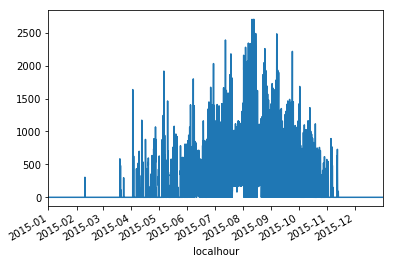

In [190]:
%matplotlib inline
st['/3456']['air1']['2015'].plot()


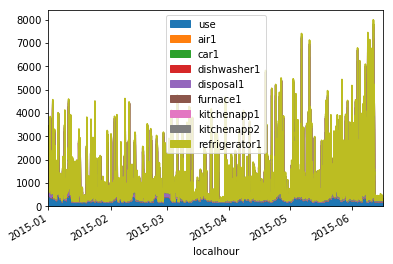

In [99]:
st['/2365']['2015'].head(4000).plot(stacked=True, kind='area')

In [16]:
out[315, 1, 280, :]

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.])

In [13]:
import sys
sys.path.append("../code/")

In [14]:
from tensor_custom_core import *

In [15]:
home, appliance, day, hour = stf_4dim(out[:10, :, :, :], 2)

670.266262014 0
208.29190535 50


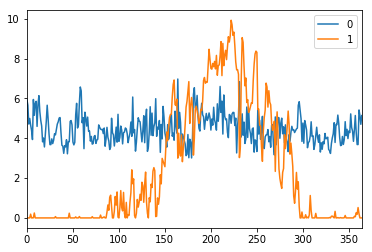

In [19]:
pd.DataFrame(day).plot()

In [17]:
%matplotlib inline

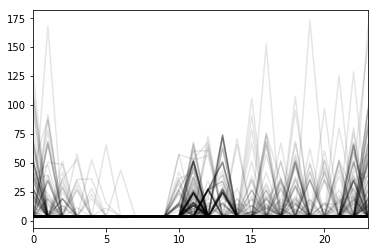

In [100]:
pd.DataFrame(out[homes.index(26)][APPLIANCES_ORDER.index("mw")]).T.plot(legend=False, color='k',alpha=0.1)

In [96]:
np.array(out).shape

(13, 7, 365, 24)

In [58]:
out_overall = {}

city_data = metadata_df[metadata_df['city'] == city]
city_homes = city_data.index.values.astype('int')
out = {}
freq_use='12-hour'
for home in city_homes[:]:
    if home in to_ignore:
        continue
    try:
        data_df = st['/%d' %home]['%d' %year]
        data_df_resampled = data_df.resample("1M").sum()
        df_res_kwh = data_df_resampled.div(1000)
        df_res_kwh.index = df_res_kwh.index.month
        # Find months where we have less than 28 days worth data and ignore those months
        day_res = data_df.resample("1D").sum()['use'].dropna()
        a = pd.value_counts(day_res.index.month)
        lt_28_days = a[a<28].index.values

        for m in lt_28_days:
            df_res_kwh.loc[m] = np.NAN

        temp = {}
        for feed_name, feed_value in feeds.iteritems():
            temp[feed_value] = []
            for month in range(year_dict['start_month'], year_dict['end_month']+1):


                try:
                    temp[feed_value].append(df_res_kwh.loc[month, feed_name])
                except:
                    temp[feed_value].append(np.NAN)
        out[home] = np.hstack(temp.values())




    except Exception, e:
        pass
appliances = temp.keys()
col_headers = []
for appliance in appliances:
    for month in range(1, 13):
        col_headers.append(appliance+"_"+str(month))
df = pd.DataFrame(out).T
df.columns = col_headers

# Read metadata
mdf = pd.read_csv("metadata/%s_md.csv" %city.replace(" ",""), index_col=0)
for column in mdf.columns:
    df[column] = mdf[column]

city = city.replace(" ","")
out_overall[year][city] =df

tdf = df[['aggregate_'+str(month) for month in range(1, 13)]].dropna().copy()
full_agg = {}


for home in df.index:
    if home in tdf.index:
        full_agg[home] = 1


    else:
        full_agg[home] = 0

NameError: name 'to_ignore' is not defined